# Part 1: Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
dflogins = pd.read_json("Datasets/logins.json")

In [3]:
dflogins.shape

(93142, 1)

In [4]:
dflogins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
dflogins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
#There is no null value. Describe dataset
dflogins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [9]:
def intervals_15(dflogins):
    hr = str(dflogins.hour)
    mins = ""
    
    if dflogins.minute < 15:
        mins = "00"
    elif dflogins.minute < 30:
        mins = "15"
    elif dflogins.minute < 45:
        mins = "30"
    elif dflogins.minute <= 59:
        mins = "45"
    hr_mins = hr + ":" + mins
    
    return hr_mins

In [11]:
dflogins['15mins'] = dflogins['login_time'].apply(intervals_15)
dflogins['hour'] = dflogins['login_time'].apply(lambda x: x.hour)

In [12]:
dflogins.shape

(93142, 4)

In [13]:
dflogins.head()

,login_time,count,15mins,hour
0,1970-01-01 20:13:18,1,20:00,20
1,1970-01-01 20:16:10,1,20:15,20
2,1970-01-01 20:16:37,1,20:15,20
3,1970-01-01 20:16:36,1,20:15,20
4,1970-01-01 20:26:21,1,20:15,20


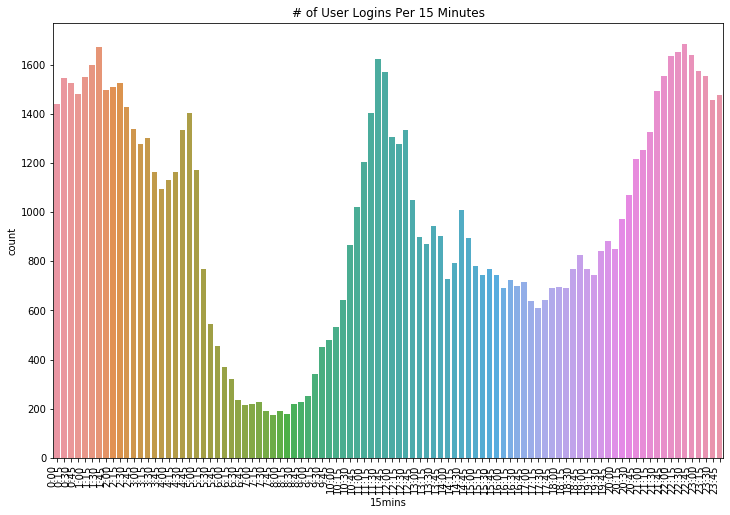

In [18]:
time_order = []
for k in range(0,24):
    for i in ["00","15","30","45"]:
        time_order.append(str(k) +":"+ i)
        
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="15mins", data=dflogins, order=time_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("# of User Logins Per 15 Minutes")
plt.xticks()
plt.show()

__INTERPRETATION:__ It is noty clear in 15 minutes intervals. So, I will try to create a figure for the nuymber of user logins per hour instead. 

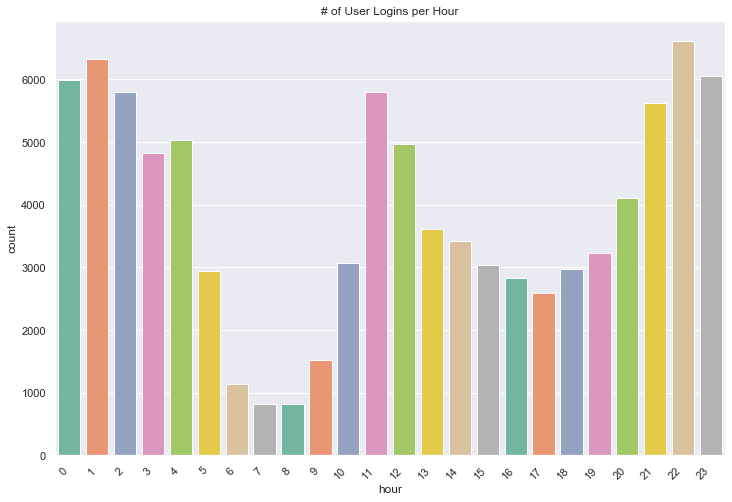

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="hour", data=dflogins, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title("# of User Logins per Hour")
plt.show()

__INTERPRETATION:__ This is much better as seen in the countplot, users don't usually login between 5am and 10am and the lowest number of logins occurs between 6am and 9am which are less than 1000. It again starts raising up from 10am to noon and immeadiately starts going down until 5pm. And then again it starts to go up until 10pm when it reaches to peak level. 

# Part 2: Experiment and metrics design¶
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
how you will implement the experiment.
what statistical test(s) you will conduct to verify the significance of the observation.
how you would interpret the results and provide recommendations to the city operations team along with any caveats.

__1:__ __What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?__

I think a metric which shows the total number of rides should be enough as the key measure of success because this will reflect the total reimbursement of the activities in both cities. Since the Ultimate managers of city operations aims the higher overall activity, the total number of rides in both cities will be the key success measure of reimbursement. 


__2:__ __Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:__

__2.1:__ __How you will implement the experiment?__
    
Drivers' activities will be tracked so that it could be possible to see the change in toll costs by comparing it to pre-reimbursement implementation. The lenght and budget of the cities could be two indicators. 

__2.2:__ __What statistical test(s) you will conduct to verify the significance of the observation:__

I would do a hyphothesis test with bootstraping to compare the means at 95% significance level. My null hyphotesis could be there is no difference between the means of rides before and after reimbursement. On the other hand, the alternative hyphothesis should state the difference to the favor of the means after reimbursement. 

__2.3:__ __How you would interpret the results and provide recommendations to the city operations team along with any caveats?__

It depends of the results. If the null hyphotesis is true and obtained, then I would say that there is no sifgnificant difference betweeen before and after reimbursement activities. In this case, I recommend the city operations not to continue this implementation. On the other hand, if the null hyphotehsis is rejected, I would recommend a continuation of the reimbursement. 

# __PART 3:__ __PREDICTIVE MODELING__

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

__Data description__

#city: city this user signed up in
#phone: primary device for this user
#signup_date: date of account registration; in the form ‘YYYY MM DD’
#last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
#avg_dist: the average distance in miles per trip taken in the first 30 days after signup
#avg_rating_by_driver: the rider’s average rating over all of their trips
#avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
#surge_pct: the percent of trips taken with surge multiplier > 1
#avg_surge: The average surge multiplier over all of this user’s trips
#trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
#ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
#weekday_pct: the percent of the user’s trips occurring during a weekday

In [26]:
# Import libraries
import json
import datetime


In [27]:
#open the file
file=open('Datasets/ultimate_data_challenge.json','r')
df = pd.DataFrame(json.load(file))
file.close()
df.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [28]:
df.shape

(50000, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [30]:
#There are some null value in avg_rating_of_driver, phone, and Avg_rating_by_driver
# create datetimes for last_trip_date and signup date because data type for them is object.
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [33]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [34]:
#Check the number of null values
for column in list(df.columns):
    nulls= len(df[df[column].isnull()])
    if nulls != 0:
        print('There are {} null values in {}'.format(nulls, column))

There are 8122 null values in avg_rating_of_driver
There are 396 null values in phone
There are 201 null values in avg_rating_by_driver


In [35]:
df['phone'].value_counts(dropna=False)

iPhone     34582
Android    15022
NaN          396
Name: phone, dtype: int64

In [36]:
#I want to fill null values with means

df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

In [37]:
#Check the number of null values again
for column in list(df.columns):
    nulls= len(df[df[column].isnull()])
    if nulls != 0:
        print('There are {} null values in {}'.format(nulls, column))

There are 396 null values in phone


In [38]:
s = df['phone'].value_counts(normalize=True)
nullphone = df['phone'].isnull()
df.loc[nullphone,'phone'] = np.random.choice(s.index, size=len(df[nullphone]),p=s.values)
print(df)

                 city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                  4.700000       1.10     2014-06-17   iPhone       15.4   
1                  5.000000       1.00     2014-05-05  Android        0.0   
2                  4.300000       1.

In [39]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [40]:
#Check the number of null values again
for column in list(df.columns):
    nulls= len(df[df[column].isnull()])
    if nulls != 0:
        print('There are {} null values in {}'.format(nulls, column))

In [41]:
df['phone'].value_counts(dropna=False)

iPhone     34850
Android    15150
Name: phone, dtype: int64

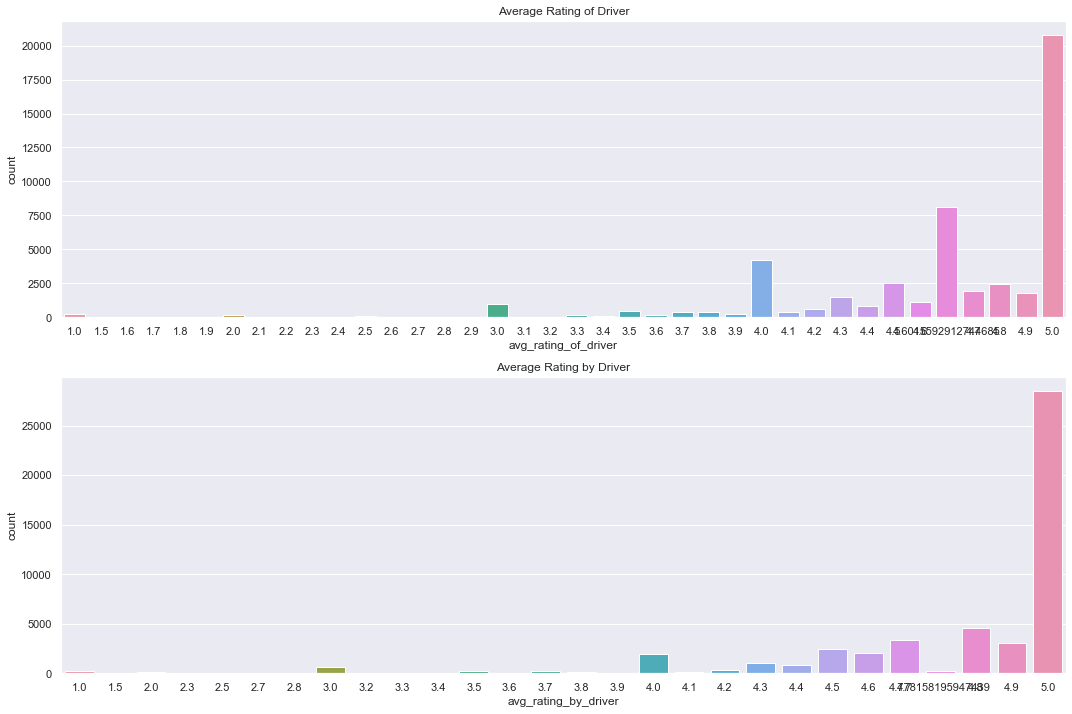

In [46]:
#plot avergage rating of driver and by driver

fig, ax = plt.subplots(2,1, figsize=(18, 12))

sns.countplot(x="avg_rating_of_driver", data=df, ax=ax[0])
ax[0].set_title('Average Rating of Driver')

sns.countplot(x="avg_rating_by_driver", data=df, ax=ax[1])
ax[1].set_title('Average Rating by Driver')
plt.xticks()

plt.show()

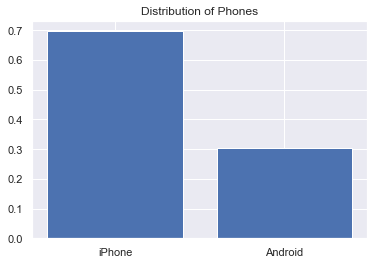

In [48]:
#  Plot the distributions for phone

plt.bar([1,2], df['phone'].value_counts(normalize=True), align='center')
plt.xticks([1,2], ['iPhone', 'Android'])
plt.title('Distribution of Phones')
plt.show;

In [49]:
# As seen in the dataset, there are some numerical values and some categorical variables
# I want to plot each of them but I first need to create categories.

num_var = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

cat_var = ['city', 'phone', 'ultimate_black_user']

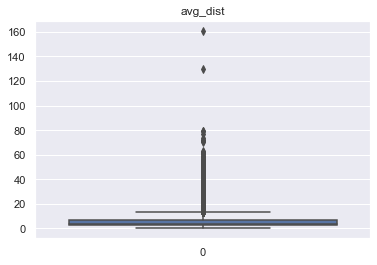

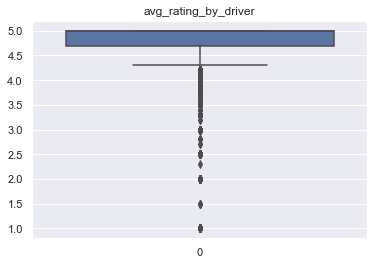

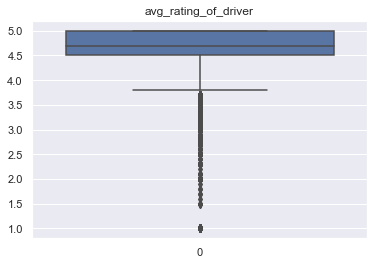

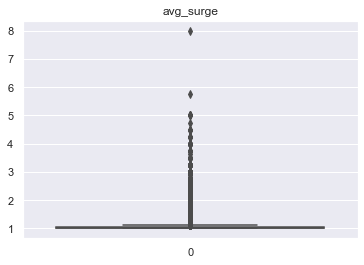

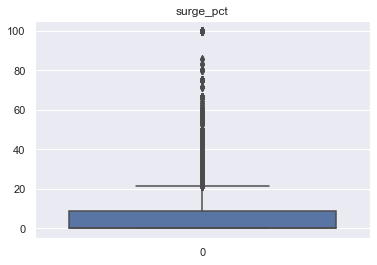

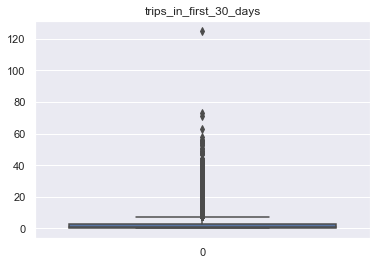

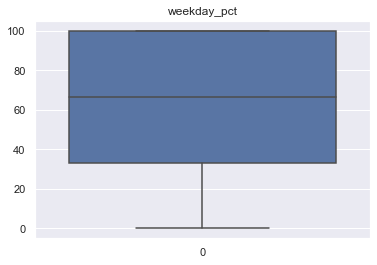

In [50]:
# Plot numerical variables

for var in num_var:
    sns.boxplot(data=df[var])
    plt.title(var)
    plt.show();

__INTERPRETATION:__ There are some outliers in all numerical features except for weekday_pct. 

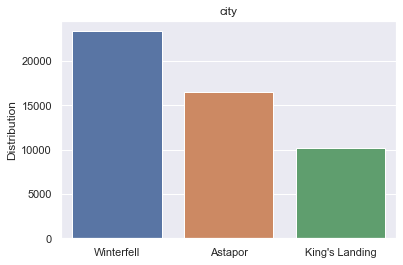

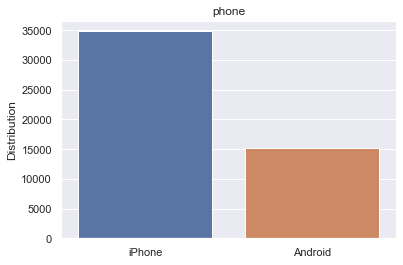

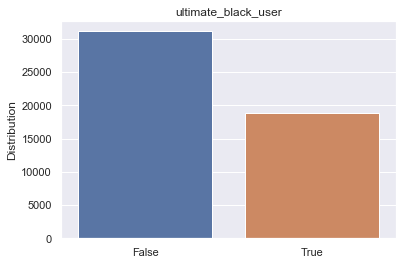

In [52]:
# Plot of all categorical except time-series

for vars in cat_var:
    sns.barplot(x = list(df[vars].value_counts().index), 
                y = df[vars].value_counts())
    plt.title(vars)
    plt.ylabel('Distribution')
    plt.show();

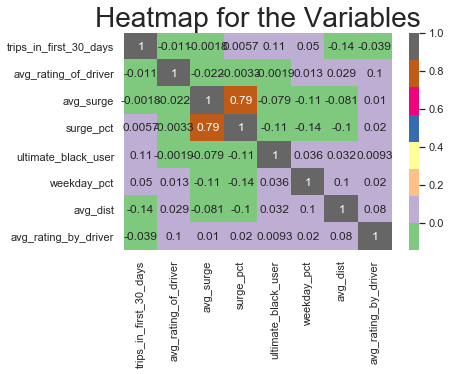

In [58]:
#Create a correlation matrix
fig.set_size_inches(20, 8)
sns.heatmap(df.corr(), cmap='Accent', annot = True)
plt.title('Heatmap for the Variables', fontsize = 28)
plt.show()

__INTERPRETATION:__ I see that surge_pct and avg_surge are highly correlated with eachother at 0.79, and this totally makes sense given these two features are being a surge or not. 

# __What fraction of the observed users were retained?__

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [60]:
# Maximum date could be the latest available date from data
date = max(df.last_trip_date)

# Check if rider is retained from activity 30 days preceding latest date, activity in Jan
df["retention"] = (df.last_trip_date >= (date + datetime.timedelta(-30))).astype(int)

In [61]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


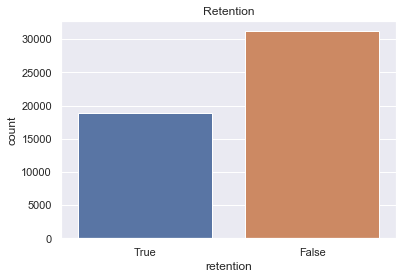

The retention for January riders is 37.61%.


In [62]:
#plot retention for January
ax = sns.countplot(x="retention", data=df, order=[True, False])
ax.set_title('Retention')

plt.show()

print('The retention for January riders is {:.2f}%.'.format(df['retention'].mean()*100))

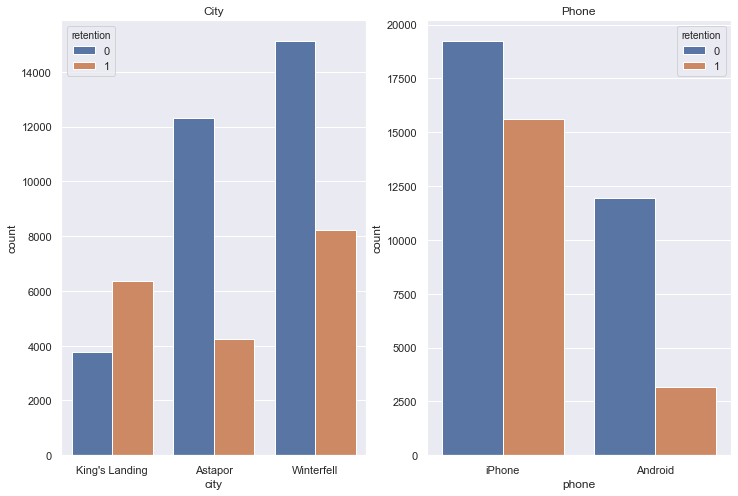

In [63]:
#Checking retention based on cities and phone type

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

sns.countplot(x="city", hue='retention', data=df, ax=ax[0])
ax[0].set_title('City')

sns.countplot(x="phone", hue='retention',data=df, ax=ax[1])
ax[1].set_title('Phone')

plt.show()

__INTERPRETATION:__ For cities, the least number of rides happened in Kings' Landing but the retention rate is higher compare to other cities. For phones, there might be a need for easy to use applications but iPhone are the mostly used phone and its retention rate is better than Android phones. 

__Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.__

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import itertools

In [78]:
#I already Dropped other datetime variables and avg_surge and surge_pct
df.head()


,city,trips_in_first_30_days,avg_rating_of_driver,phone,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,4.7,iPhone,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,Android,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,iPhone,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,iPhone,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,Android,False,82.4,3.13,4.9,0


In [79]:
#get dummies for categorical variables
df_dummied= pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])

df_dummied.head()

,trips_in_first_30_days,avg_rating_of_driver,weekday_pct,avg_dist,avg_rating_by_driver,retention,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,5.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,4.3,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,4.6,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,4.4,82.4,3.13,4.9,0,0,0,1,1,0,1,0


In [80]:
# Split features and target variable
X = df_dummied.drop('retention', axis=1)
y = df_dummied['retention']

In [81]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [82]:
def plot_auc_curve(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # plot curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [83]:
def model_report(model, X, y, title):
    """Takes in classifier model with X data and class weight to display scores and confusion matrix."""

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1111)
    
    clf = model(random_state=1111)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    class_names = ['Not Retained', 'Retained']
    
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))    
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
      
    # Plot confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    
    # Plot auc curve
    plot_auc_curve(clf, X_test, y_test)
    
    return clf

/Users/remzikizilboga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.72
              precision    recall  f1-score   support

Not Retained       0.74      0.85      0.79      9465
    Retained       0.65      0.50      0.56      5535

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



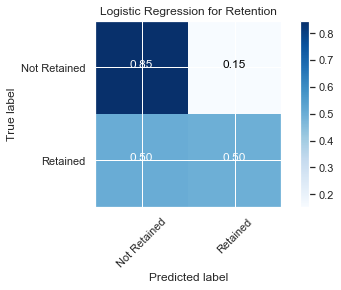

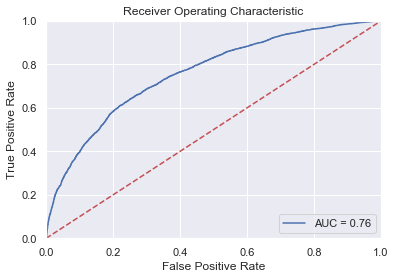

In [86]:
# Logistic regression modeling
logreg = model_report(LogisticRegression, X, y,'Logistic Regression for Retention')

Accuracy: 0.75
              precision    recall  f1-score   support

Not Retained       0.80      0.80      0.80      9465
    Retained       0.66      0.65      0.65      5535

    accuracy                           0.75     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.75      0.75      0.75     15000



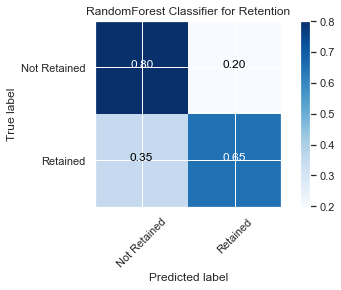

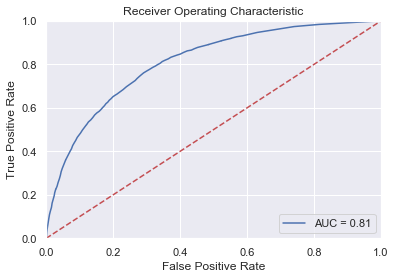

In [85]:
# Random Forest classifier
rf = model_report(RandomForestClassifier, X, y,'RandomForest Classifier for Retention')

__INTERPRETATION:__ I applied logistic regression and random forest classifier model algorithms here. Random forest algorithm has a little bit better accuracy score (.75) than logistic regression model(.72) but both performed well.  Another option could a Support Vector Machine (SVM) model and hyperparameter tuning can be used to increase the model performance. 

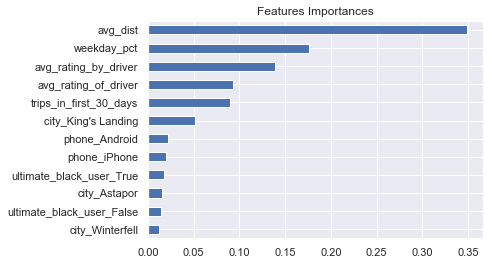

In [87]:
#check the features importances
#Briefly discuss how Ultimate might leverage the insights gained from the model 
#to improveits longterm rider retention (again, a few sentences will suffice).

labels = list(X.columns)
features_importances = list(rf.feature_importances_)

features = dict(zip(labels, features_importances))
features_series = pd.Series(features).sort_values()

features_series.plot.barh()
plt.title('Features Importances')
plt.show()

__INTERPRETATION:__ The retention rate for the city of King's landing is much higher than other two cities. So, in terms of marketing strategies, it is better to make investments for the city of King's Landing. In terms of the importance of the type of the phone, there is no big difference between Android and iPhone but in terestingly the retention rate is a little bit higher for Android than iPhone even though the majority of users prefer iPhones. 